# Chapter 3: Linear Regression for a housing dataset

### Importing the necessary packages

In [1]:
!git clone https://github.com/s7s/machine_learning_1
%cd  machine_learning_1/linear_regression
# https://docs.google.com/presentation/d/1NfC05Wi6sAkbS9U4X6RW9jyW5auU901wPTRAtopw9qA/edit?usp=drive_link

fatal: destination path 'machine_learning_1' already exists and is not an empty directory.
/content/machine_learning_1/linear_regression


In [2]:
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

### Defining and plotting our dataset

In [3]:
features = np.array([1,2,3,5,6,7])
labels = np.array([155, 197, 244, 356,407,448])

print(features)
print(labels)

[1 2 3 5 6 7]
[155 197 244 356 407 448]


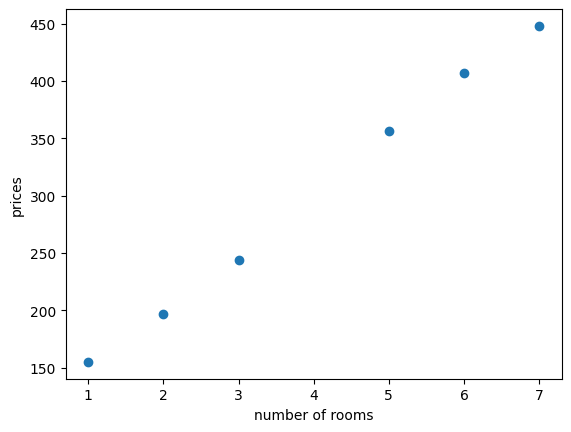

In [4]:
utils.plot_points(features, labels)

### Coding the tricks

- Simple trick
- Absolute trick
- Square trick

In [5]:
def simple_trick(base_price, price_per_room, num_rooms, price):
    small_random_1 = random.random()*0.1
    small_random_2 = random.random()*0.1
    predicted_price = base_price + price_per_room*num_rooms
    if price > predicted_price and num_rooms > 0:
        price_per_room += small_random_1
        base_price += small_random_2
    if price > predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    if price < predicted_price and num_rooms > 0:
        price_per_room -= small_random_1
        base_price -= small_random_2
    if price < predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    return price_per_room, base_price

In [6]:
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    ## TODO ##
    #implement square_trick and return the new price_per_room and base_price
    # calculate the predicted price then calculate the new price_per_room and base_price
    predict = price_per_room*num_rooms+base_price
    r = num_rooms
    base_price=base_price+learning_rate*(price-predict)
    price_per_room=price_per_room+r*learning_rate*(price-predict)
    return price_per_room, base_price

In [7]:
def absolute_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    ## TODO ##
    #implement absolute_trick and return the new price_per_room and base_price
    # calculate the predicted price then calculate the new price_per_room and base_price
    predict = price_per_room*num_rooms+base_price
    r = num_rooms
    z = 1 if price > predict else -1

    base_price=base_price+learning_rate*z
    price_per_room=price_per_room+r*learning_rate*z
    return price_per_room, base_price





### Running the linear regression algorithm

The linear regression algorithm consists of:
- Starting with random weights
- Iterating the square (or simple, or absolute) trick many times.

In [8]:
data={"features":features,
      "labels":labels}
data

{'features': array([1, 2, 3, 5, 6, 7]),
 'labels': array([155, 197, 244, 356, 407, 448])}

Price per room: 40.22442185152521
Base price: 10.757954402940118
Price per room: 60.000725880463705
Base price: 48.02067978971811
Price per room: 50.38756133217806
Base price: 97.30198200132797


Text(0.5, 1.0, 'learning_rate = 0.01, for epochs in  [ 1000, 10000 , 100000]')

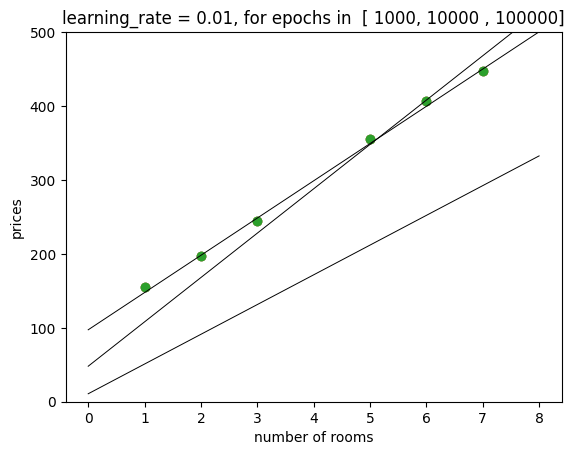

In [9]:
import random as rd

# We set the random seed in order to always get the same results.
random.seed(0)

def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room =  random.random() # start with random weight
    base_price =  random.random() # start with random bias
    ## TODO ##
    # for this number of epochs
    # get a random datasample of our dataset(x,y)
    # using the selected datasample use square_trick fn or absolute_trick fn to update price_per_room and base_price
    for w in range(epochs):
      z=random.randint(0,5)
      num_rooms = features[z]
      price = labels[z]
      #price_per_room, base_price =square_trick(base_price, price_per_room, num_rooms, price, learning_rate)
      price_per_room, base_price=absolute_trick(base_price, price_per_room, num_rooms, price, learning_rate)

    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=8)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    return price_per_room, base_price

# This line is for the x-axis to appear in the figure
plt.ylim(0,500)

linear_regression(features, labels, learning_rate = 0.01, epochs = 1000)
linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)
linear_regression(features, labels, learning_rate = 0.01, epochs = 100000)
plt.title("learning_rate = 0.01, for epochs in  [ 1000, 10000 , 100000]")

Price per room: 51.04430678220095
Base price: 91.59448307644864
Price per room: 50.65781332767556
Base price: 99.79504258184782
Price per room: 49.86863027119082
Base price: 99.79925416531361


(49.86863027119082, 99.79925416531361)

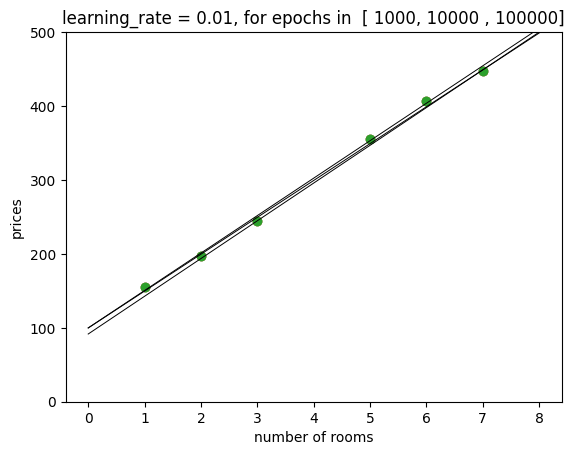

In [10]:
import random as rd

# We set the random seed in order to always get the same results.
random.seed(0)

def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room =  random.random() # start with random weight
    base_price =  random.random() # start with random bias
    ## TODO ##
    # for this number of epochs
    # get a random datasample of our dataset(x,y)
    # using the selected datasample use square_trick fn or absolute_trick fn to update price_per_room and base_price
    for w in range(epochs):
      z=random.randint(0,5)
      num_rooms = features[z]
      price = labels[z]
      price_per_room, base_price =square_trick(base_price, price_per_room, num_rooms, price, learning_rate)
      #price_per_room, base_price=absolute_trick(base_price, price_per_room, num_rooms, price, learning_rate)

    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=8)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    return price_per_room, base_price

# This line is for the x-axis to appear in the figure
plt.ylim(0,500)

linear_regression(features, labels, learning_rate = 0.01, epochs = 1000)
plt.title("learning_rate = 0.01, for epochs in  [ 1000, 10000 , 100000]")
linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)
linear_regression(features, labels, learning_rate = 0.01, epochs = 100000)

In [11]:
random.randint(0,6)

5

### Root mean squared error function

In [12]:
# The root mean square error function
def rmse(labels, predictions):
    ## TODO ##
    # calculate the root meen square error between the labels and predictions
    error= np.square(2*len(labels)*(labels-predictions))
    error=error.sum()
    error =np.sqrt(error)
    return error


### Plotting the error function

Price per room: 50.06773938204483
Base price: 99.14048956979605


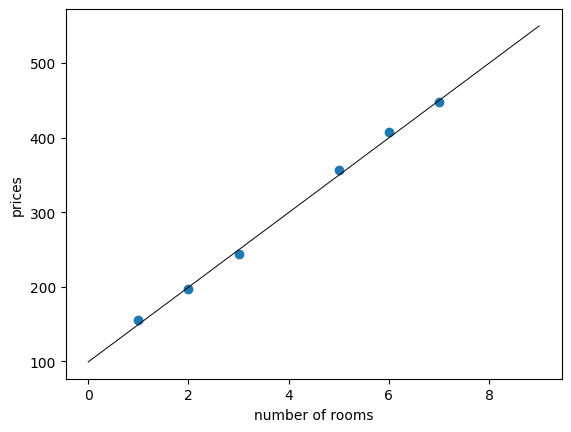

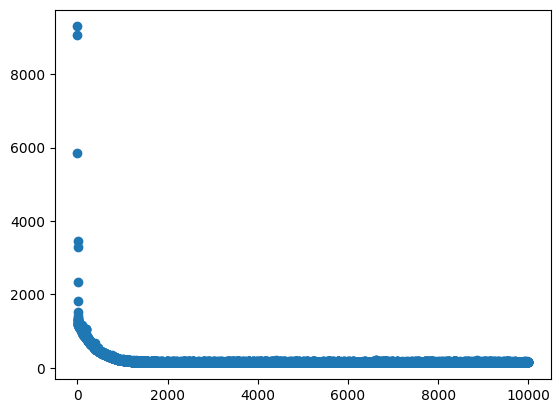

(50.06773938204483, 99.14048956979605)

In [13]:
def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    errors = []
    for i in range(epochs):
        predictions = features*price_per_room+base_price
        errors.append(rmse(labels, predictions))
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        # Uncomment one of the following 3 lines to use the simple, the absolute, or the square trick
        #price_per_room, base_price = simple_trick(base_price,
        #price_per_room, base_price = absolute_trick(base_price,
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=9)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    plt.show()
    plt.scatter(range(len(errors)), errors)
    plt.show()
    return price_per_room, base_price

linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)

### Linear regression using sklearn



In [14]:
from sklearn.linear_model import SGDRegressor
## TODO ##
# Use sklearn to implement linear regression (SGDRegressor) that fit our data (features, labels)
# set tol = None
# Tune alpha and max_iter
model = SGDRegressor(max_iter=1000,alpha=.01)
model.fit(features.reshape(-1,1),labels)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(alpha=0.01)

In [15]:
from ast import mod
## TODO ##
# print the coefficients and bias of this model
model.coef_


array([52.6045914])

In [16]:
## TODO ##
# use this model to predict the price of house that contains 4 rooms
model.predict([[4]])


array([298.58277131])

### Normal Equation



In [17]:
def Normal_Equation(features,labels):
    ## TODO ##
    # Use normal equation to get the weights
    # don't forget to concatenate ones to the features
    ones = np.ones((features.shape[0], 1))
    X = np.concatenate([ones, features.reshape(-1,1)], axis=1)
    W = np.linalg.inv(X.T @ X) @ X.T @ labels
    return W

W = Normal_Equation(features,labels)
print(W)

[99.5952381  50.39285714]


### Real Example (Predict fuel efficiency)

In [18]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

#### Get data

In [20]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [21]:
dataset = raw_dataset.copy()
dataset.head()

MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   Model Year  Origin  
0          70       1  
1          70       1  
2          70       1  
3          70       1  
4          70       1

#### Clean data

In [22]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [23]:
dataset = dataset.dropna()

In [24]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [25]:
dataset.head()

MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   Model Year  Origin  
0          70       1  
1          70       1  
2          70       1  
3          70       1  
4          70       1

In [26]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [27]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

In [28]:
dataset.head()

MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   Model Year  Europe  Japan   USA  
0          70   False  False  True  
1          70   False  False  True  
2          70   False  False  True  
3          70   False  False  True  
4          70   False  False  True

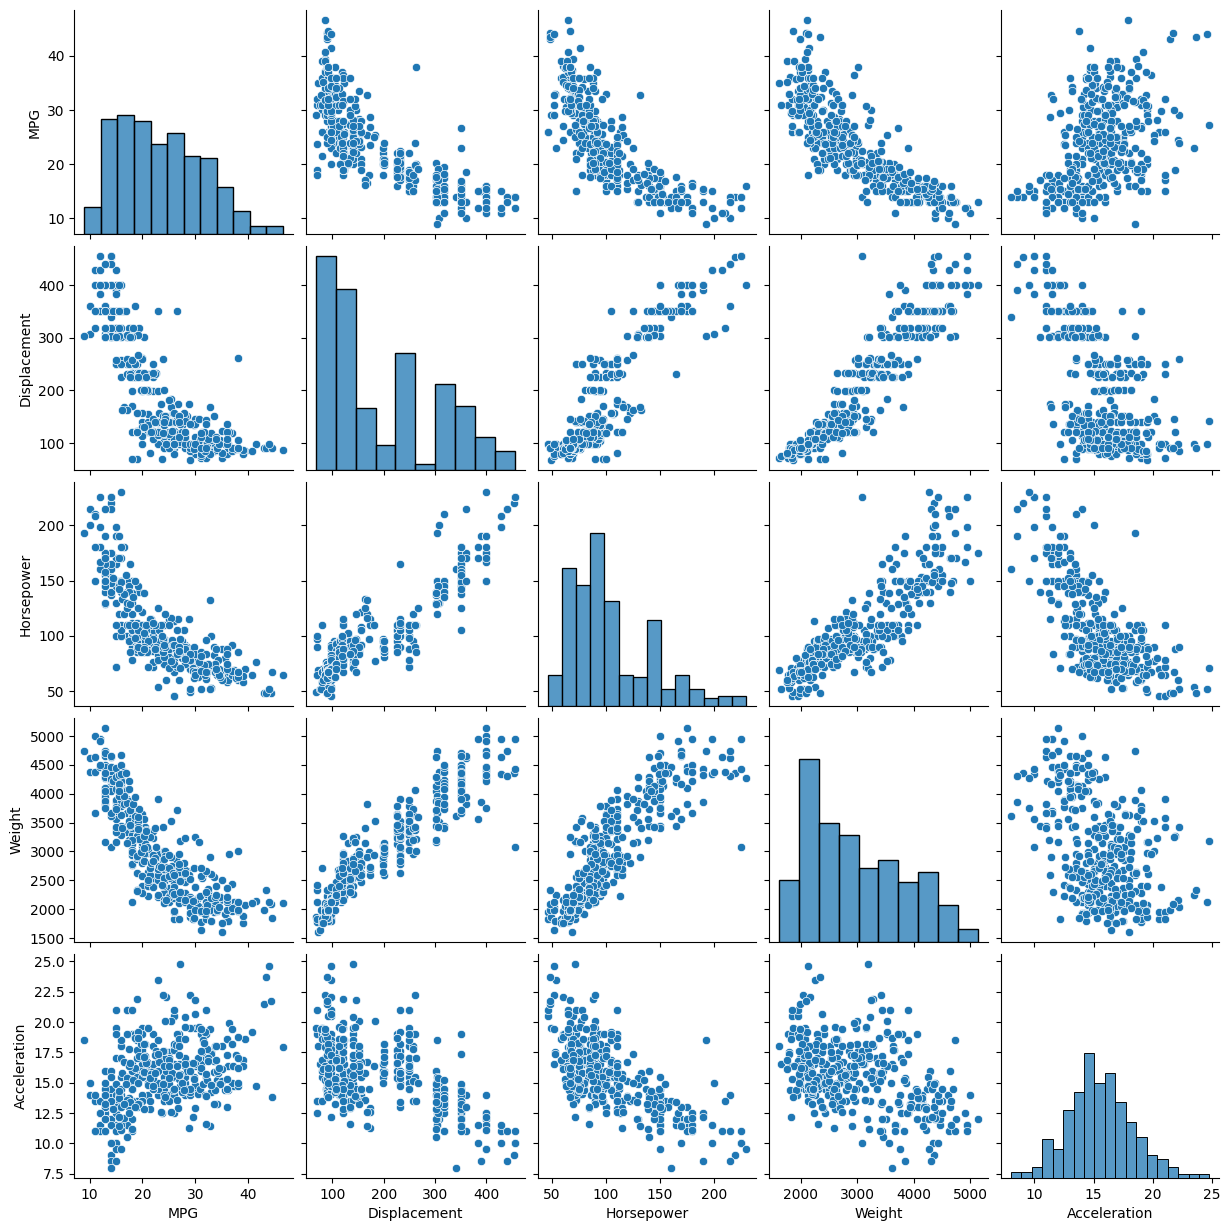

In [29]:
sns.pairplot(dataset[['MPG','Displacement', 'Horsepower', 'Weight','Acceleration']])

In [30]:
datasetXsingle=dataset[['Horsepower']]
datasetXMulti=dataset[['Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Europe','Japan','USA']]
datasetY=dataset[['MPG']]

In [36]:
from sklearn.linear_model import SGDRegressor

# use single-variable input to fit linear regression model
# set tol = None
# Tune alpha and max_iter
# print the score and the mse error
model = SGDRegressor(max_iter=100000,alpha=.00001,tol =None)
model.fit(datasetXsingle,datasetY)
score = model.score(datasetXsingle,datasetY)
score

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.24624605913684128

In [37]:
from sklearn.metrics import mean_squared_error as mse
mse_value = mse(datasetY, model.predict(datasetXsingle))
print(np.sqrt(mse_value))

6.767581071441465


In [68]:
from sklearn.linear_model import SGDRegressor

# use multi-variable input to fit linear regression model
# set tol = None
# Tune alpha and max_iter
# print the score and the mse error
model = SGDRegressor(max_iter=1000,alpha=.01)
model.fit(datasetXMulti,datasetY)
score = model.score(datasetXMulti,datasetY)
score

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-9.333664350081709e+26

In [69]:
mse_value = mse(datasetY, model.predict(datasetXMulti))
print(np.sqrt(mse_value))

238146804642090.8


In [94]:
datasetXMulti

array([[ 1.484,  1.077,  0.664, ..., -0.458, -0.502,  0.775],
       [ 1.484,  1.489,  1.575, ..., -0.458, -0.502,  0.775],
       [ 1.484,  1.183,  1.184, ..., -0.458, -0.502,  0.775],
       ...,
       [-0.864, -0.568, -0.532, ..., -0.458, -0.502,  0.775],
       [-0.864, -0.712, -0.663, ..., -0.458, -0.502,  0.775],
       [-0.864, -0.722, -0.585, ..., -0.458, -0.502,  0.775]])

In [97]:
from sklearn.linear_model import SGDRegressor


# use Normalized mlti-variable input to fit linear regression model
# set tol = None
# Tune alpha and max_iter
# use sklearn.preprocessing.StandardScaler for normalization
# print the score and the mse error
model = SGDRegressor(max_iter=1000,alpha=.01,tol= None)
model.fit(datasetXMulti,datasetY)
score = model.score(datasetXMulti,datasetY)
score

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.82339070882599

In [98]:
mse_value = mse(datasetY, model.predict(datasetXMulti))
print(np.sqrt(mse_value))

3.275860828254025
